In [1]:
import pandas as pd
import keras
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Activation
from keras.layers import SimpleRNN, TimeDistributed
from sklearn import model_selection

csv_data=pd.read_csv("data/blader-data.csv")


Using TensorFlow backend.


In [9]:
# print(csv_data.describe())
print(len(csv_data.columns))

#change column values
csv_data = csv_data.replace({'qclass': {1: 'high', 0:'low'}})

23


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [16]:
#setting features and labels

all_features=csv_data.iloc[:, 0:22]
all_labels=csv_data['qclass']

encoder.fit(all_labels)
all_labels_encoded = encoder.transform(all_labels)







In [17]:
#training and testing split

X_train,X_test,Y_train,Y_test=model_selection.train_test_split(all_features,all_labels_encoded,test_size=0.20)

#X_train=csv_data.iloc[:, 0:22]
#Y_train=csv_data['qclass']

#X_train.describe()
#Y_train.describe()

input_dim=X_train.shape[1]

print(encoder.classes_)

['high' 'low']


In [82]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_sampled, Y_train_sampled = sm.fit_sample(X_train, Y_train)



In [18]:
encoder.transform(["low","high","low"])

array([1, 0, 1], dtype=int64)

In [83]:


#input_dim=X_train.shape[1]

model = Sequential()
model.add(Dense(64,input_shape=(input_dim,)))
model.add(Activation("tanh"))
model.add(Dense(output_dim=2))
model.add(Activation("softmax"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 64)                1472      
_________________________________________________________________
activation_11 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
_________________________________________________________________
activation_12 (Activation)   (None, 2)                 0         
Total params: 1,602
Trainable params: 1,602
Non-trainable params: 0
_________________________________________________________________


c:\programdata\anaconda3\envs\graphembed\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=2)`
  


In [66]:



one_hot_labels = keras.utils.to_categorical(Y_train, num_classes=2)
print(one_hot_labels)

test_one_hot_labels=keras.utils.to_categorical(Y_test,num_classes=2)
print(test_one_hot_labels)



[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [85]:
one_hot_labels = keras.utils.to_categorical(Y_train_sampled, num_classes=2)
print(one_hot_labels)

test_one_hot_labels=keras.utils.to_categorical(Y_test,num_classes=2)
print(test_one_hot_labels)

[[0. 1.]
 [0. 1.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [23]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\programdata\anaconda3\envs\graphembed\lib\site-packages (0.5.0)


In [76]:
#creating a balanced batch


#system command to install imblearn
# !pip install -U imbalanced-learn

from imblearn.keras import balanced_batch_generator
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE




training_generator, steps_per_epoch = balanced_batch_generator(X_train, one_hot_labels, sampler=SMOTE(), batch_size=10, random_state=42)


ValueError: 'sampler' needs to have an attribute 'sample_indices_'.

In [86]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [88]:
model.fit(X_train_sampled, one_hot_labels, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 0.8047 - acc: 0.4870
Epoch 2/100
 - 0s - loss: 0.7082 - acc: 0.5130
Epoch 3/100
 - 0s - loss: 0.6981 - acc: 0.5170
Epoch 4/100
 - 0s - loss: 0.6980 - acc: 0.5212
Epoch 5/100
 - 0s - loss: 0.6913 - acc: 0.5387
Epoch 6/100
 - 0s - loss: 0.6927 - acc: 0.5165
Epoch 7/100
 - 0s - loss: 0.6870 - acc: 0.5269
Epoch 8/100
 - 0s - loss: 0.6888 - acc: 0.5297
Epoch 9/100
 - 0s - loss: 0.6887 - acc: 0.5249
Epoch 10/100
 - 0s - loss: 0.6936 - acc: 0.5170
Epoch 11/100
 - 0s - loss: 0.6947 - acc: 0.5162
Epoch 12/100
 - 0s - loss: 0.6904 - acc: 0.5224
Epoch 13/100
 - 0s - loss: 0.6909 - acc: 0.5112
Epoch 14/100
 - 0s - loss: 0.6883 - acc: 0.5334
Epoch 15/100
 - 0s - loss: 0.6897 - acc: 0.5202
Epoch 16/100
 - 0s - loss: 0.6869 - acc: 0.5307
Epoch 17/100
 - 0s - loss: 0.6880 - acc: 0.5294
Epoch 18/100
 - 0s - loss: 0.6854 - acc: 0.5299
Epoch 19/100
 - 0s - loss: 0.6906 - acc: 0.5140
Epoch 20/100
 - 0s - loss: 0.6904 - acc: 0.5377
Epoch 21/100
 - 0s - loss: 0.6884 - acc: 0.5277
E

In [79]:
model.fit(X_sampled, Y_sampled, epochs=100, verbose=2)

ValueError: Error when checking target: expected activation_10 to have shape (2,) but got array with shape (1,)

In [73]:
model.fit_generator(generator=training_generator,  steps_per_epoch=steps_per_epoch, epochs=100, verbose=2)

Epoch 1/100
 - 1s - loss: 0.6974 - acc: 0.5252
Epoch 2/100
 - 1s - loss: 0.6946 - acc: 0.5272
Epoch 3/100
 - 1s - loss: 0.6922 - acc: 0.5177
Epoch 4/100
 - 1s - loss: 0.6909 - acc: 0.5337
Epoch 5/100
 - 1s - loss: 0.6945 - acc: 0.5172
Epoch 6/100
 - 1s - loss: 0.6955 - acc: 0.5257
Epoch 7/100
 - 1s - loss: 0.6940 - acc: 0.5297
Epoch 8/100
 - 1s - loss: 0.6927 - acc: 0.5327
Epoch 9/100
 - 1s - loss: 0.6962 - acc: 0.5100
Epoch 10/100
 - 1s - loss: 0.6962 - acc: 0.5077
Epoch 11/100
 - 1s - loss: 0.6944 - acc: 0.5087
Epoch 12/100
 - 1s - loss: 0.6944 - acc: 0.5130
Epoch 13/100
 - 1s - loss: 0.6943 - acc: 0.5214
Epoch 14/100
 - 1s - loss: 0.6949 - acc: 0.5132
Epoch 15/100
 - 1s - loss: 0.6963 - acc: 0.5090
Epoch 16/100
 - 1s - loss: 0.6954 - acc: 0.5140
Epoch 17/100
 - 1s - loss: 0.6946 - acc: 0.5127
Epoch 18/100
 - 1s - loss: 0.6963 - acc: 0.5117
Epoch 19/100
 - 1s - loss: 0.6973 - acc: 0.5100
Epoch 20/100
 - 1s - loss: 0.6958 - acc: 0.5190
Epoch 21/100
 - 1s - loss: 0.6958 - acc: 0.5170
E

In [101]:
# model.predict(X_test)
#scores = model.evaluate(X_test, test_one_hot_labels, verbose=0)

predictions=model.predict(X_test)

#print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(test_one_hot_labels.argmax(axis=1), predictions.argmax(axis=1), labels=[0,1])
print(matrix)



tn,fp,fn,tp =  matrix.ravel()

acc1=tp/(tp+fp)
acc0=tn/(tn+fn)

print(acc1,acc0)


[[178  12]
 [442  28]]
0.7 0.2870967741935484


In [90]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t/p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [100]:
print_cm(matrix,['0','1'])

     t/p      0     1 
        0 178.0  12.0 
        1 442.0  28.0 


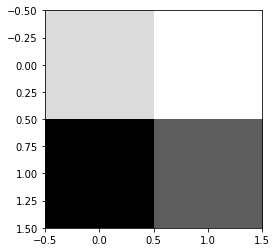

In [235]:
#print(test_one_hot_labels)

import matplotlib.pyplot as plt

plt.imshow(matrix, cmap='binary', interpolation='None')
plt.show()



In [94]:
from scipy import stats
stats.describe(Y_test)

DescribeResult(nobs=660, minmax=(0, 1), mean=0.7121212121212122, variance=0.20531567572538742, skewness=-0.9369842739743568, kurtosis=-1.1220604703247476)

AttributeError: 'numpy.ndarray' object has no attribute 'head'